<h2>Лабораторна робота №6</h2>                                                                                                    
<h3>Застосування numpy</h3>
<h3>ФБ-24 Демченко Олександр</h3>

Мета роботи: отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та
градієнтного спуску.

Постановка задачі:
Ознайомитися з теоретичними матеріалами. Створити програму для обчислення лінійної регресії
методом найменших квадратів та градієнтним спуском.

Необхідні пакети для виконання даної лабораторної роботи:<br>
pip install numpy matplotlib seaborn tabulate

In [242]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
print("Setup!") # Feedback 

Setup!


Завдання 1

1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу

<img src="./task_1.png">

In [243]:
β_0 = np.random.randint(0, 15) # intercept
β_1 = np.random.randint(1, 15) # slope

x = np.linspace(0, 10, 100) # незалежна змінна
ε = np.random.normal(0, 1.5, 100) # генеруємо шум 

y_ε = β_0 + β_1 * x + ε # модель простої лінійної регресії, де y - залежна змінна
y = β_1 * x + β_0 # рівняння прямої

print(f"intercept: {β_0}")
print(f"slope: {β_1}")

intercept: 5
slope: 13


Візуалізуємо два модель простої лінійної регресії та рівняння прямої

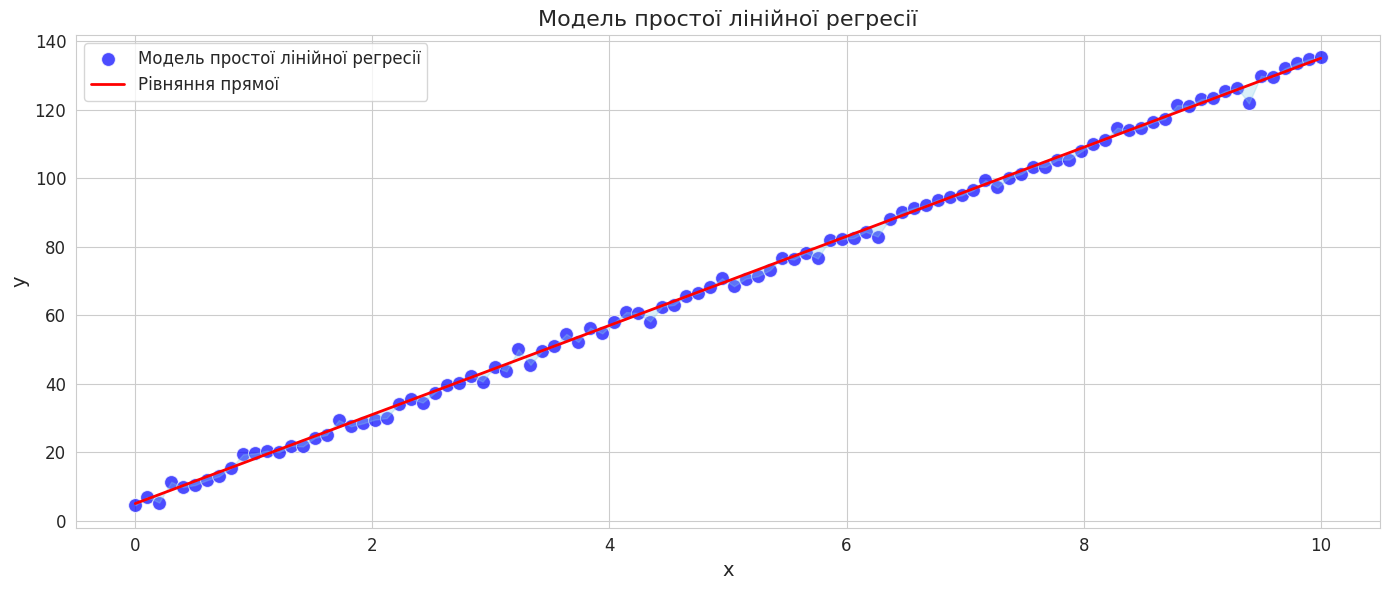

In [244]:
# Візуалізуємо 
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")  
sns.scatterplot(x=x, y=y_ε, label='Модель простої лінійної регресії', color='blue', alpha=0.7, s=100) 
sns.lineplot(x=x, y=y, color='red', label='Рівняння прямої', linewidth=2) 
plt.fill_between(x, y_ε, y, color='skyblue', alpha=0.3)  
plt.xlabel('x', fontsize=14)  
plt.ylabel('y', fontsize=14)  
plt.title('Модель простої лінійної регресії', fontsize=16)  
plt.legend(fontsize=12)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.tight_layout()  
plt.show() 

2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k(avg) та b(avg).

<img src="./task_2.png">

In [245]:
# Функція реалізовує метод найменших квадратів та повертає оптимальні оцінки k та b 
def method_of_least_squares(x, y):
    # Обчислення середніх значень x та y
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Обчислення оптимального кутового коефіцієнта k_optimal
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    β_1_optimal = numerator / denominator
    
    # Обчислення оптимального вільного коефіцієнта b_optimal
    β_0_optimal = y_mean - β_1_optimal * x_mean
    
    return β_0_optimal, β_1_optimal

# отримання оптимальних оцінок коефіцієнтів k та b
β_0_optimal, β_1_optimal = method_of_least_squares(x, y_ε)
print(f"Оптимальний коефіцієнт зсуву: {β_0_optimal}") 
print(f"Оптимальний кутовий коефіцієнт:  {β_1_optimal}")

print(f"Коефіцієнт зсуву: {β_0}") 
print(f"Кутовий коефіцієнт: {β_1}")

Оптимальний коефіцієнт зсуву: 4.556999113386823
Оптимальний кутовий коефіцієнт:  13.032524892887128
Коефіцієнт зсуву: 5
Кутовий коефіцієнт: 13


3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).

In [246]:
np_aprox = np.polyfit(x, y_ε, 1)
β_1_np_polyfit = np_aprox[0]
β_0_np_polyfit = np_aprox[1]

print(f"Оптимальний коефіцієнт зсуву: {β_0_np_polyfit}") 
print(f"Оптимальний кутовий коефіцієнт:  {β_1_np_polyfit}")

Оптимальний коефіцієнт зсуву: 4.556999113386843
Оптимальний кутовий коефіцієнт:  13.032524892887126


In [247]:
print("\t\t\t\tПорівняльна таблиця\n")

# Дані
data = {
    "": ["Пряма з початковими параметрами", "МНК", "np.polyfit"],
    "k": [β_1, β_1_optimal, β_1_np_polyfit],
    "b": [β_0, β_0_optimal, β_0_np_polyfit]
}

# Створення списку кортежів для tabulate
table_data = [(label, k_value, b_value) for label, k_value, b_value in zip(data[""], data["k"], data["b"])]

# Виведення таблиці з використанням tabulate
print(tabulate(table_data, headers=["Оцінки", "Кутовий коефіцієнт - β_1", "Коефіцієнт зсуву - β_0"], tablefmt="github", floatfmt=".20f"))

				Порівняльна таблиця

| Оцінки                          |   Кутовий коефіцієнт - β_1 |   Коефіцієнт зсуву - β_0 |
|---------------------------------|----------------------------|--------------------------|
| Пряма з початковими параметрами |    13.00000000000000000000 |   5.00000000000000000000 |
| МНК                             |    13.03252489288712823168 |   4.55699911338682284168 |
| np.polyfit                      |    13.03252489288712645532 |   4.55699911338684326978 |


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

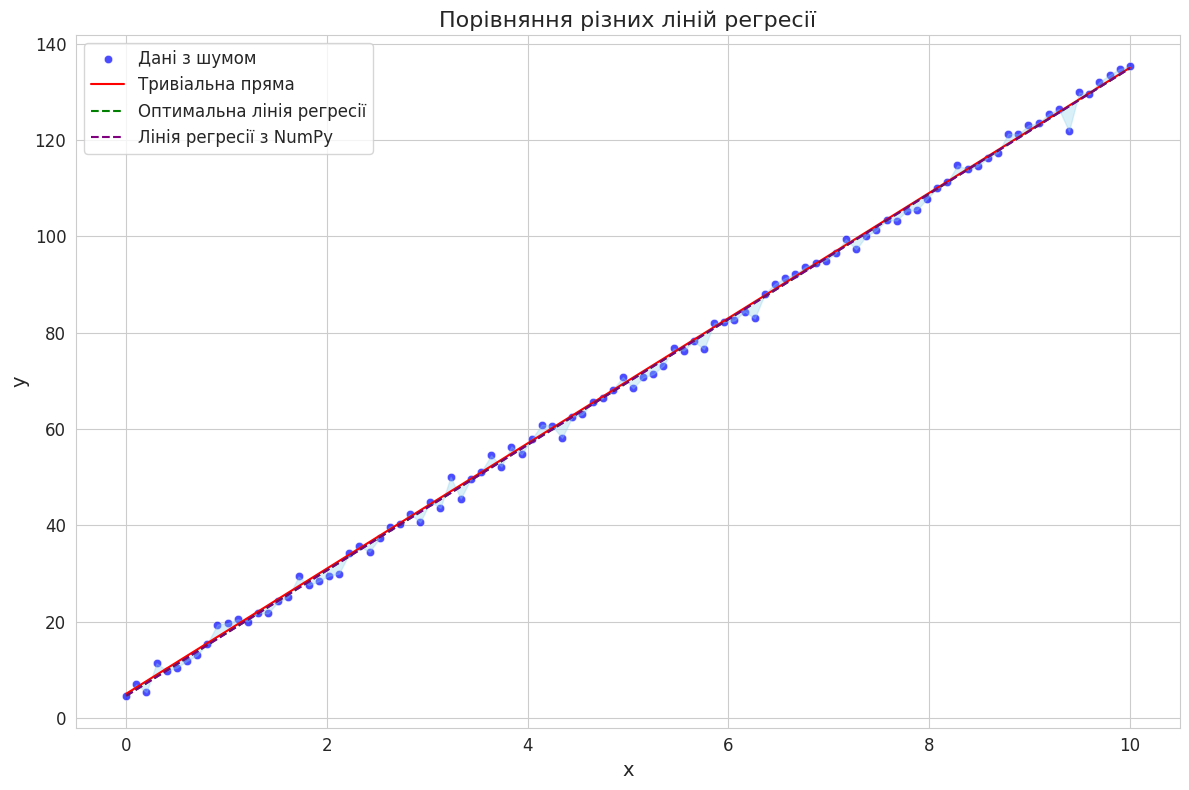

In [248]:
def plot_regression(x, ε, β_1, β_0, β_1_optimal, β_0_optimal, β_1_np_polyfit, β_0_np_polyfit):
    plt.figure(figsize=(12, 8))  # Змінив розмір графіку

    # Побудова графіку за допомогою sns
    sns.scatterplot(x=x, y=β_1 * x + β_0 + ε, label='Дані з шумом', color='blue', alpha=0.7)  
    sns.lineplot(x=x, y=β_1 * x + β_0, color='red', label='Тривіальна пряма')  
    plt.fill_between(x, β_1 * x + β_0 + ε, β_1 * x + β_0, color='skyblue', alpha=0.3)  

    # Відображення оцінок лінії регресії
    sns.lineplot(x=x, y=β_1_optimal * x + β_0_optimal, color='green', linestyle='--', label='Оптимальна лінія регресії')  
    sns.lineplot(x=x, y=β_1_np_polyfit * x + β_0_np_polyfit, color='purple', linestyle='--', label='Лінія регресії з NumPy')  

    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)  
    plt.title('Порівняння різних ліній регресії', fontsize=16)  
    plt.legend(fontsize=12)  
    plt.xticks(fontsize=12)  
    plt.yticks(fontsize=12)  
    plt.grid(True)  
    plt.tight_layout()  
    plt.show()

# Використання зазначеної вами кодової конструкції для побудови графіку
plot_regression(x, ε, β_1, β_0, β_1_optimal, β_0_optimal, β_1_np_polyfit, β_0_np_polyfit)


Завдання 2

1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k(avg) та b(avg). Визначіть оптимальні вхідні параметри: learning_rate, n_iter

<img src="task_3.png">

Оптимальні оцінки:
	Оптимальний кутовий коефіцієнт: 13.03252489288731
	Оптимальний коефіцієнт зсуву: 4.556999113385697
Оригінальні коефіцієнти: 
	Оптимальний кутовий коефіцієнт: 13
	Оптимальний коефіцієнт зсуву: 5


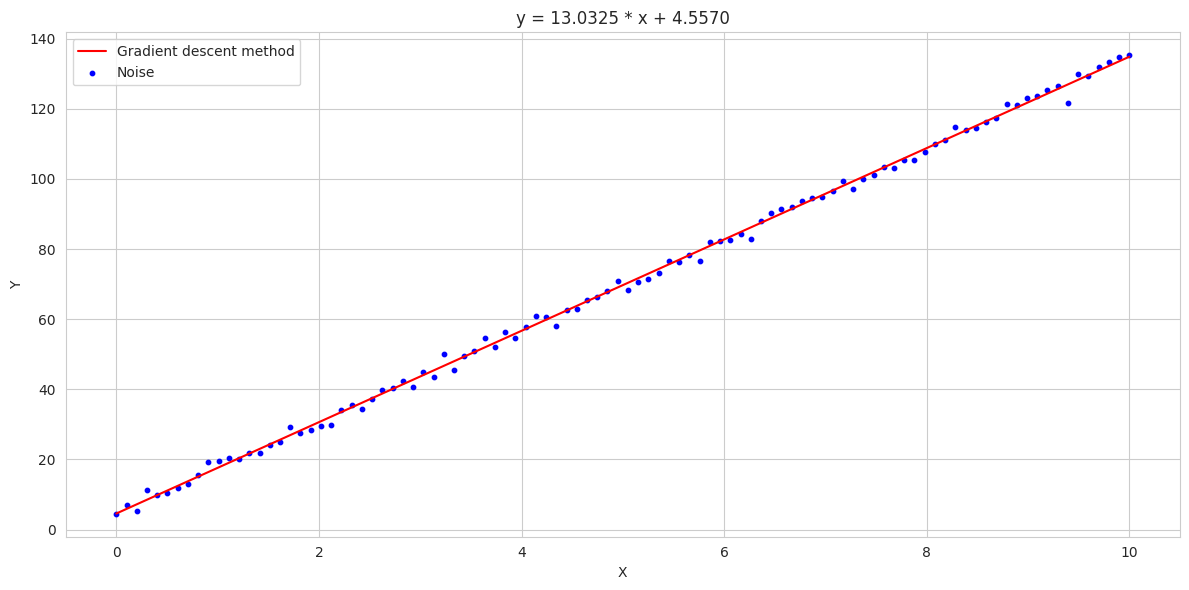

In [249]:
# Функція реалізовує метод градієнтного спуску
def gradient_descent(x, y, learning_rate, n_iter):
    # Ініціалізуємо початкові значення коефіцієнту нахилу та зсуву
    β_0 = 0
    β_1 = 0 
    
    # Розмір набору даних
    n = len(x)
    
    # Перевірка параметрів
    if n_iter <= 0 or learning_rate <= 0:
        raise ValueError("Параметри learning_rate та n_iter повинні бути більше 0")
    
    # Реалізація алгоритму градієнтного спуску
    for _ in range(n_iter):
        # Обчислюємо поточні прогнози для кожного рядка
        y_predicted = β_0 + β_1 * x
        
        # Обчислюємо часткові похідні по кожному з параметрів
        der_gradient_β_0 = (-2/n) * sum(y - y_predicted)
        der_gradient_β_1 = (-2/n) * sum(x * (y - y_predicted))
                
        # Оновлюємо параметри, використовуючи знайдені часткові похідні та коефіцієнт навчання
        β_0 -= learning_rate * der_gradient_β_0
        β_1 -= learning_rate * der_gradient_β_1
        
    return β_0, β_1

# Оптимальні параметри градієнтного спуску: learning_rate, n_iter
learning_rate = 0.001
n_iter = 100000

# Виклик функції градієнтного спуску
β_0_optimal_grad, β_1_optimal_grad = gradient_descent(x, y_ε, learning_rate, n_iter)
print("Оптимальні оцінки:")
print(f"\tОптимальний кутовий коефіцієнт: {β_1_optimal_grad}")
print(f"\tОптимальний коефіцієнт зсуву: {β_0_optimal_grad}") 
print(f"Оригінальні коефіцієнти: ")
print(f"\tОптимальний кутовий коефіцієнт: {β_1}")
print(f"\tОптимальний коефіцієнт зсуву: {β_0}")


grad_y = β_1_optimal_grad * x + β_0_optimal_grad

plt.figure(figsize=(12, 6))
plt.plot(x, grad_y, color='r', label="Gradient descent method")
plt.scatter(x, y_ε, color='b', label="Noise", s=10)
plt.ylabel("Y")
plt.xlabel("X")
plt.title(f"y = {β_1_optimal_grad:.4f} * x + {β_0_optimal_grad:.4f}")
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()



2. Додайте отриману лінію регресії на загальний графік

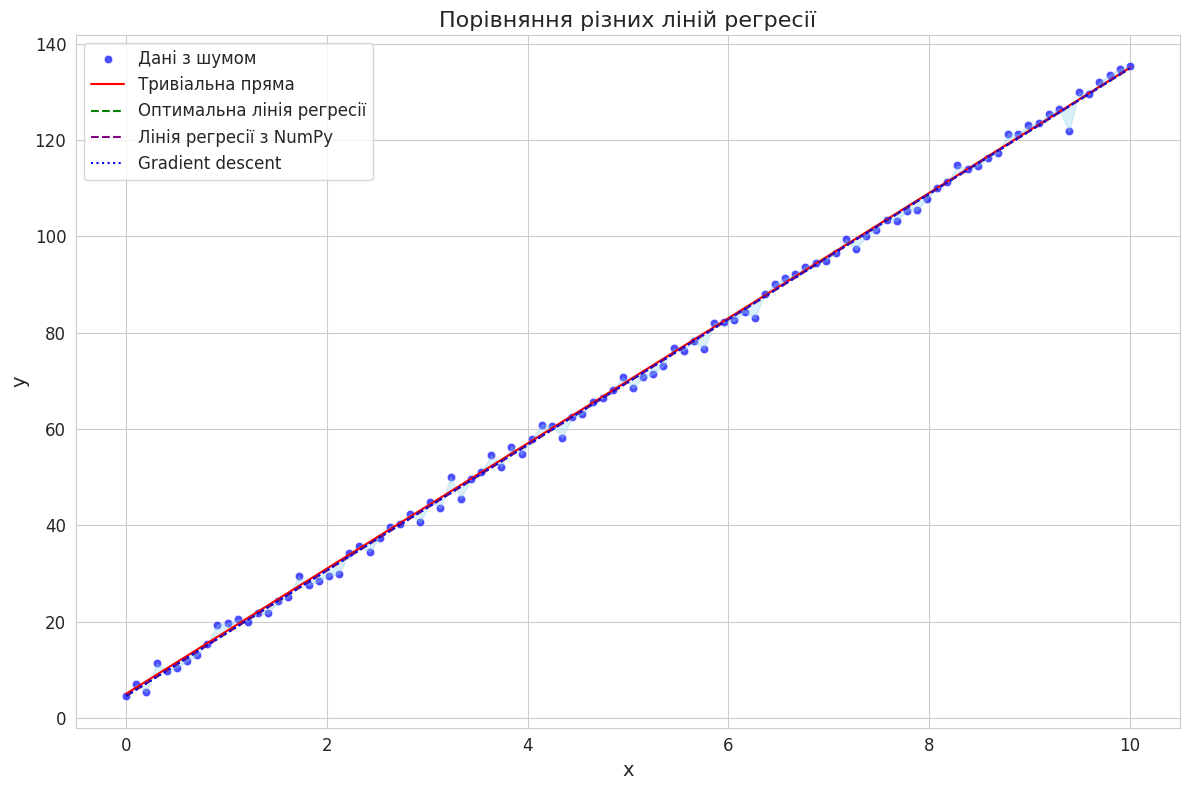

In [250]:
def plot_regression(x, ε, β_1, β_0, β_1_optimal, β_0_optimal, β_1_np_polyfit, β_0_np_polyfit, β_1_optimal_grad, β_0_optimal_grad):
    plt.figure(figsize=(12, 8))  # Змінив розмір графіку
    
    # Побудова графіку за допомогою sns
    sns.scatterplot(x=x, y=β_1 * x + β_0 + ε, label='Дані з шумом', color='blue', alpha=0.7)  
    sns.lineplot(x=x, y=β_1 * x + β_0, color='red', label='Тривіальна пряма')  
    plt.fill_between(x, β_1 * x + β_0 + ε, β_1 * x + β_0, color='skyblue', alpha=0.3)  

    # Відображення оцінок лінії регресії
    sns.lineplot(x=x, y=β_1_optimal * x + β_0_optimal, color='green', linestyle='--', label='Оптимальна лінія регресії')  
    sns.lineplot(x=x, y=β_1_np_polyfit * x + β_0_np_polyfit, color='purple', linestyle='--', label='Лінія регресії з NumPy')  
    
    sns.lineplot(x=x, y=β_1_optimal_grad * x + β_0_optimal_grad, color='blue', linestyle=':', label='Gradient descent')

    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)  
    plt.title('Порівняння різних ліній регресії', fontsize=16)  
    plt.legend(fontsize=12)  
    plt.xticks(fontsize=12)  
    plt.yticks(fontsize=12)  
    plt.grid(True)  
    plt.tight_layout()  
    plt.show()

# Використання зазначеної вами кодової конструкції для побудови графіку
plot_regression(x, ε, β_1, β_0, β_1_optimal, β_0_optimal, β_1_np_polyfit, β_0_np_polyfit, β_1_optimal_grad, β_0_optimal_grad)

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

<img src="./task_5.png">

In [251]:
def calculate_MSE(x, y, dev=0.01):
    errors = [] # for errors
    iterations = [] # for iterations 
    for n_iter in range(100, 100000, 100):
        β_0_grad, β_1_grad = gradient_descent(x, y, learning_rate, n_iter)
        mse_error = np.sum((y - β_0_grad - β_1_grad * x) ** 2) / len(x)
        if (len(errors) != 0) and (abs(errors[-1] - mse_error) < dev):
            break
        errors.append(mse_error)
        iterations.append(n_iter)
    return errors, iterations

errors, iterations = calculate_MSE(x, y_ε, 0.001)
print(f"Errors: {errors}")
print(f"Iterations: {iterations}")

Errors: [3.582908256400094, 3.438425462388382, 3.311512627995084, 3.1965972285400532, 3.092545109594712, 2.9983293342646755, 2.9130200449295565, 2.835775286062281, 2.765832694593434, 2.7025019758092172, 2.645158090524222, 2.5932350862901505, 2.5462205117580616, 2.503650359066796, 2.46510448434192, 2.430202461107907, 2.398599825689145, 2.369984677543866, 2.3440746009782227, 2.320613877859502, 2.2993709638195248, 2.28013620303972, 2.2627197590640917, 2.24694974121834, 2.2326705081439404, 2.21974113170395, 2.208034006100219, 2.197433588474691, 2.1878352585652783, 2.1791442861616885, 2.171274896170634, 2.1641494220630793, 2.157697539348518, 2.1518555715111236, 2.1465658615577623, 2.1417762029753344, 2.1374393244813263, 2.1335124234824168, 2.129956743636525, 2.1267371923491343, 2.1238219944288, 2.1211823784835473, 2.1187922929631737, 2.116628149044828, 2.1146685878243554, 2.1128942695157575, 2.111287682578159, 2.109832970886603, 2.1085157772408554, 2.1073231016677694, 2.1062431731187425]
It

# test

In [262]:
import pandas as pd

def gradient_descent_2(x, y, learning_rate, n_iter, dev=0.0001):
    β_0_test = 0
    β_1_test = 0 
    n = len(x)
    errors = []
    
    if n_iter <= 0 or learning_rate <= 0:
        raise ValueError("Параметри learning_rate та n_iter повинні бути більше 0")
    
    prev_mse = 0  
    
    for iter_count in range(1, n_iter + 1):
        y_predicted = β_0_test + β_1_test * x
        der_gradient_β_0 = (-2/n) * sum(y - y_predicted)
        der_gradient_β_1 = (-2/n) * sum(x * (y - y_predicted))
                
        β_0_test -= learning_rate * der_gradient_β_0
        β_1_test -= learning_rate * der_gradient_β_1
               
        mse_error = np.sum((y - (β_0_test + β_1_test * x)) ** 2) / len(x)
        errors.append(mse_error)
        
        if (len(errors) != 0) and (abs(errors[-1] - prev_mse) < dev):
            break        
        
        prev_mse = mse_error
        
    return β_0_test, β_1_test, mse_error, errors, iter_count

def calculate_MSE_2(x, y, learning_rates):
    best_learning_rate = None
    best_mse = float('inf')  # необмежене верхнє значення для порівняння. Це корисно для пошуку найнижчих значень для чогось.
    convergence_iteration = None
    
    for learning_rate_iter in learning_rates:
        β_0_test, β_1_test, mse_error, _, iter_count = gradient_descent_2(x, y, learning_rate_iter, 1000000)
        if mse_error < best_mse:
            best_mse = mse_error
            best_learning_rate = learning_rate_iter
            convergence_iteration = iter_count
    
    return β_0_test, β_1_test, best_mse, best_learning_rate, convergence_iteration

learning_rates = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.15, 0.025]
β_0_test, β_1_test, best_mse, best_learning_rate, convergence_iter = calculate_MSE_2(x, y_ε, learning_rates)

print(f"Найкращий MSE: {best_mse} для learning rate: {best_learning_rate}")
print(f"Збіжність на ітерації: {convergence_iter}")

results = []

for learning_rate_iter in learning_rates:
    β_0_test, β_1_test, mse, _, iter_count = calculate_MSE_2(x, y_ε, [learning_rate_iter])
    results.append({'Learning Rate': learning_rate_iter, 'MSE': mse, 'Convergence Iteration': iter_count, 'k':β_1_test, 'b':β_0_test})

results_df = pd.DataFrame(results)
print(results_df)
print(f"\nOriginal value:{β_1} {β_0}")


/tmp/ipykernel_5880/3396536086.py:25: RuntimeWarning: invalid value encountered in scalar subtract
  if (len(errors) != 0) and (abs(errors[-1] - prev_mse) < dev):
/tmp/ipykernel_5880/3396536086.py:22: RuntimeWarning: overflow encountered in square
  mse_error = np.sum((y - (β_0_test + β_1_test * x)) ** 2) / len(x)
/tmp/ipykernel_5880/3396536086.py:17: RuntimeWarning: overflow encountered in scalar add
  der_gradient_β_1 = (-2/n) * sum(x * (y - y_predicted))
/tmp/ipykernel_5880/3396536086.py:22: RuntimeWarning: invalid value encountered in multiply
  mse_error = np.sum((y - (β_0_test + β_1_test * x)) ** 2) / len(x)
/tmp/ipykernel_5880/3396536086.py:15: RuntimeWarning: invalid value encountered in multiply
  y_predicted = β_0_test + β_1_test * x


Побудуємо графік похибки від кількості ітерацій

min_mse 2.486924730848459 for iteration 5900


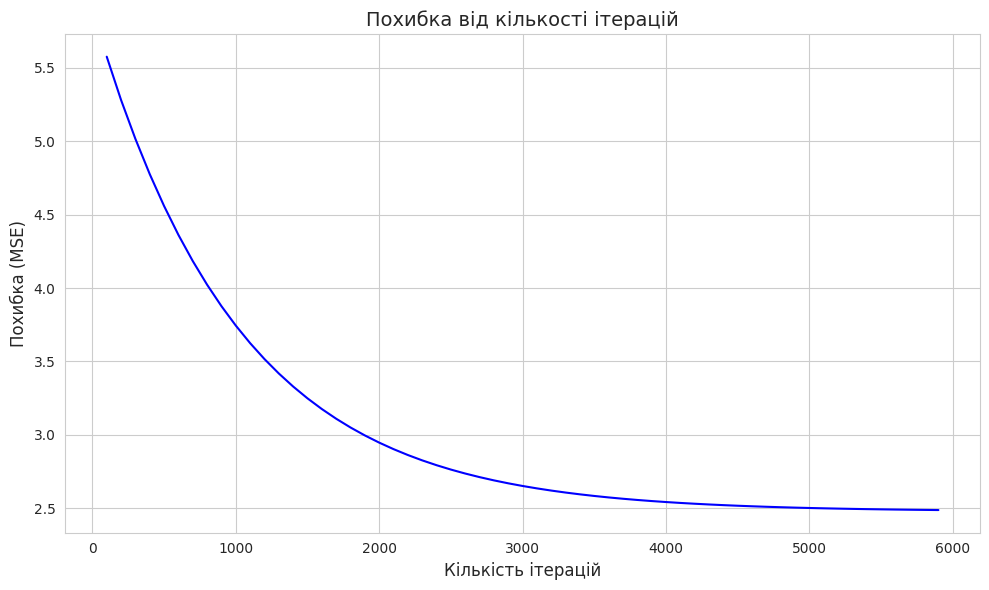

min_mse 2.486924730848459 for iteration 5900


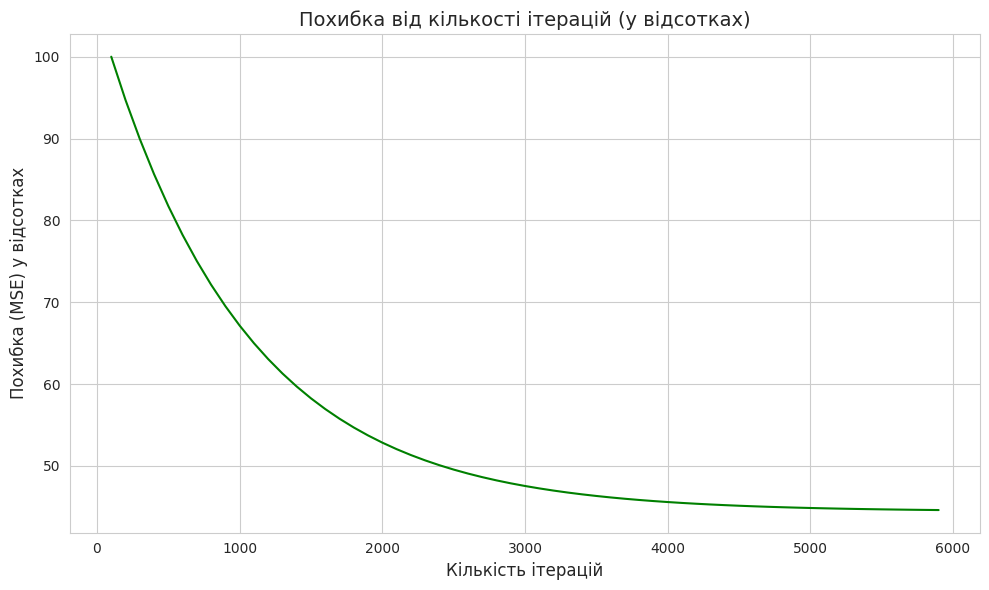

In [ ]:
errors_percent = [(error / max(errors)) * 100 for error in errors]

def plot_error_vs_iterations_percentages(errors_percent):
    print(f"min_mse {errors[-1]} for iteration {iterations[-1]}")
    plt.figure(figsize=(10, 6))  
    plt.plot(iterations, errors_percent, color='green')  
    plt.xlabel('Кількість ітерацій', fontsize=12)  
    plt.ylabel('Похибка (MSE) у відсотках', fontsize=12) 
    plt.title('Похибка від кількості ітерацій (у відсотках)', fontsize=14) 
    plt.tight_layout() 
    plt.grid(True)
    plt.show() 

def plot_error_vs_iterations(errors):
    plt.figure(figsize=(10, 6)) 
    print(f"min_mse {errors[-1]} for iteration {iterations[-1]}")
    plt.plot(iterations, errors, color='blue')  
    plt.xlabel('Кількість ітерацій', fontsize=12)  
    plt.ylabel('Похибка (MSE)', fontsize=12)  
    plt.title('Похибка від кількості ітерацій', fontsize=14) 
    plt.tight_layout() 
    plt.grid(True)
    plt.show()

# Побудова графіка похибки від кількості ітерацій
plot_error_vs_iterations(errors)
plot_error_vs_iterations_percentages(errors_percent)

4. Порівняйте отримані результати з результатами попереднього завдання

In [ ]:
print("\t\t\t\tПорівняльна таблиця\n")

# Дані
data = {
    "": ["Пряма з початковими параметрами", "МНК", "np.polyfit", "Метод градієнтного спуску"],
    "k": [β_1, β_1_optimal, β_1_np_polyfit, β_1_optimal_grad],
    "b": [β_0, β_0_optimal, β_0_np_polyfit, β_0_optimal_grad]
}

# Створення списку кортежів для tabulate
table_data = [(label, k_value, b_value) for label, k_value, b_value in zip(data[""], data["k"], data["b"])]

# Виведення таблиці з використанням tabulate
print(tabulate(table_data, headers=["Оцінки", "Кутовий коефіцієнт - β_1", "Коефіцієнт зсуву - β_0"], tablefmt="github", floatfmt=".20f"))

				Порівняльна таблиця

| Оцінки                          |   Кутовий коефіцієнт - β_1 |   Коефіцієнт зсуву - β_0 |
|---------------------------------|----------------------------|--------------------------|
| Пряма з початковими параметрами |    10.00000000000000000000 |   5.00000000000000000000 |
| МНК                             |     9.98579562524935049339 |   5.25502570685150516283 |
| np.polyfit                      |     9.98579562524935226975 |   5.25502570685152470276 |
| Метод градієнтного спуску       |     9.98579562524953168179 |   5.25502570685039316345 |
